In [1]:
import json
import pandas as pd


with open('C:/Users/User/OneDrive/Pictures/CSV Files/FCBG.json') as f:
    data = json.load(f)                                             #loads data from JSON file

pi = []
player = []
x = []
y = []
endx = []
endy = []
team = []
outcome = []
minute = []

for a, b in data.items():
    if a == 'playerIdNameDictionary':
        for i, n in b.items():
            pi.append([i, n])

for k in data['events']:
    if k['type']['displayName'] == 'Pass':
        for par, v in k.items():
            if par == 'x':
                x.append(v)
            if par == 'y':
                y.append(v)
            if par == 'playerId':
                player.append(v)
            if par == 'endX':
                endx.append(v)
            if par == 'endY':
                endy.append(v)
            if par == 'teamId':
                team.append(v)
            if par == 'outcomeType':
                outcome.append(k['outcomeType']['displayName'])
            if par == 'minute':
                minute.append(v)


col_names = ['player','x','y','endx','endy','team','outcome', 'minute']
df = pd.DataFrame([player,x,y,endx,endy,team,outcome,minute], index = col_names)
df = df.T
print(df)

df.to_csv('C:/Users/User/OneDrive/Pictures/CSV Files/FCBG.csv')

      player     x      y  endx  endy team       outcome minute
0     135242  50.1   49.9  25.3  44.5  819    Successful      0
1     332990  30.3   41.9  59.0  83.3  819  Unsuccessful      0
2      90782  46.3    9.3  53.1   0.0   65  Unsuccessful      0
3     347178  43.0  100.0  61.4  90.3  819    Successful      0
4      80241  45.8    9.1  47.0  10.0   65    Successful      0
...      ...   ...    ...   ...   ...  ...           ...    ...
1077  236511  53.2   96.0  72.6  82.0   65    Successful     94
1078  243262  23.2   23.6  61.6  39.5  819  Unsuccessful     94
1079  236511  32.2   65.8  33.7  65.2   65  Unsuccessful     94
1080  422659  72.2   39.1  77.5  30.1  819    Successful     94
1081  254262  72.6   31.2  75.4  37.4  819  Unsuccessful     94

[1082 rows x 8 columns]


In [20]:
import pandas as pd
from mplsoccer.pitch import Pitch
import pandas as pd
import matplotlib as mpl
from mplsoccer.pitch import Pitch,VerticalPitch
from matplotlib.colors import to_rgba
import numpy as np
from mplsoccer.statsbomb import read_event, EVENT_SLUG
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colorbar
from matplotlib.colors import LinearSegmentedColormap
from highlight_text import fig_text
import math
df=pd.read_csv(r'C:\Users\User\OneDrive\Pictures\CSV Files\FCBG.csv')

In [21]:
df

,Unnamed: 0,player,x,y,endx,endy,team,outcome,minute
0,0,135242,50.1,49.9,25.3,44.5,819,Successful,0
1,1,332990,30.3,41.9,59.0,83.3,819,Unsuccessful,0
2,2,90782,46.3,9.3,53.1,0.0,65,Unsuccessful,0
3,3,347178,43.0,100.0,61.4,90.3,819,Successful,0
4,4,80241,45.8,9.1,47.0,10.0,65,Successful,0
...,...,...,...,...,...,...,...,...,...
1077,1077,236511,53.2,96.0,72.6,82.0,65,Successful,94
1078,1078,243262,23.2,23.6,61.6,39.5,819,Unsuccessful,94
1079,1079,236511,32.2,65.8,33.7,65.2,65,Unsuccessful,94
1080,1080,422659,72.2,39.1,77.5,30.1,819,Successful,94


In [22]:
df=df[df['team']==65].reset_index()
df=df[df['minute']<60]

In [23]:
df['passer'] = df['player']
df['recipient'] = df['player'].shift(-1)

In [24]:
df

,index,Unnamed: 0,player,x,y,endx,endy,team,outcome,minute,passer,recipient
0,2,2,90782,46.3,9.3,53.1,0.0,65,Unsuccessful,0,90782,80241.0
1,4,4,80241,45.8,9.1,47.0,10.0,65,Successful,0,80241,44721.0
2,5,5,44721,47.0,10.0,46.9,2.5,65,Successful,0,44721,328512.0
3,6,6,328512,46.9,2.5,52.5,8.9,65,Successful,0,328512,90782.0
4,7,7,90782,52.3,11.0,38.6,33.3,65,Successful,0,90782,236511.0
...,...,...,...,...,...,...,...,...,...,...,...,...
493,743,743,328512,54.3,19.2,54.2,41.0,65,Successful,58,328512,44721.0
494,744,744,44721,60.8,43.7,70.4,69.0,65,Successful,58,44721,110154.0
495,745,745,110154,80.9,65.4,85.4,54.5,65,Unsuccessful,58,110154,80774.0
496,753,753,80774,9.1,52.4,24.7,17.9,65,Successful,59,80774,279423.0


In [25]:
successful = df[df['outcome']=='Successful']

In [26]:
successful

,index,Unnamed: 0,player,x,y,endx,endy,team,outcome,minute,passer,recipient
1,4,4,80241,45.8,9.1,47.0,10.0,65,Successful,0,80241,44721.0
2,5,5,44721,47.0,10.0,46.9,2.5,65,Successful,0,44721,328512.0
3,6,6,328512,46.9,2.5,52.5,8.9,65,Successful,0,328512,90782.0
4,7,7,90782,52.3,11.0,38.6,33.3,65,Successful,0,90782,236511.0
5,8,8,236511,38.6,33.3,44.3,76.7,65,Successful,0,236511,44288.0
...,...,...,...,...,...,...,...,...,...,...,...,...
492,742,742,90782,55.1,25.6,54.3,19.2,65,Successful,58,90782,328512.0
493,743,743,328512,54.3,19.2,54.2,41.0,65,Successful,58,328512,44721.0
494,744,744,44721,60.8,43.7,70.4,69.0,65,Successful,58,44721,110154.0
496,753,753,80774,9.1,52.4,24.7,17.9,65,Successful,59,80774,279423.0


In [27]:
pas = pd.to_numeric(successful['passer'],downcast='integer')
rec = pd.to_numeric(successful['recipient'],downcast='integer')
successful['passer'] = pas
successful['recipient'] = rec

<ipython-input-27-44ac33abe828>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful['passer'] = pas
<ipython-input-27-44ac33abe828>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful['recipient'] = rec


In [28]:
average_locations = successful.groupby('passer').agg({'x':['mean'],'y':['mean','count']})
average_locations.columns = ['x','y','count']

In [29]:
average_locations

,x,y,count
passer,,,
44288,47.461702,89.780851,47
44721,44.320588,41.382353,68
73494,56.283333,46.283333,6
80241,48.521429,34.414286,14
80774,11.582143,48.760714,28
90782,49.079310,24.941379,29
110154,61.231579,78.021053,19
236511,39.773913,74.171014,69
279423,52.103704,65.911111,54


In [30]:

successful

,index,Unnamed: 0,player,x,y,endx,endy,team,outcome,minute,passer,recipient
1,4,4,80241,45.8,9.1,47.0,10.0,65,Successful,0,80241,44721.0
2,5,5,44721,47.0,10.0,46.9,2.5,65,Successful,0,44721,328512.0
3,6,6,328512,46.9,2.5,52.5,8.9,65,Successful,0,328512,90782.0
4,7,7,90782,52.3,11.0,38.6,33.3,65,Successful,0,90782,236511.0
5,8,8,236511,38.6,33.3,44.3,76.7,65,Successful,0,236511,44288.0
...,...,...,...,...,...,...,...,...,...,...,...,...
492,742,742,90782,55.1,25.6,54.3,19.2,65,Successful,58,90782,328512.0
493,743,743,328512,54.3,19.2,54.2,41.0,65,Successful,58,328512,44721.0
494,744,744,44721,60.8,43.7,70.4,69.0,65,Successful,58,44721,110154.0
496,753,753,80774,9.1,52.4,24.7,17.9,65,Successful,59,80774,279423.0


In [31]:
#now we need to find the number of passes between each player
pass_between = successful.groupby(['passer','recipient']).index.count().reset_index()
pass_between.rename({'index':'pass_count'},axis='columns',inplace=True)

#merge the average location dataframe. We need to merge on the passer first then the recipient
pass_between = pass_between.merge(average_locations, left_on='passer',right_index=True)
pass_between = pass_between.merge(average_locations, left_on='recipient',right_index=True,suffixes=['', '_end'])

In [32]:

pass_between

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
0,44288,44721.0,7,47.461702,89.780851,47,44.320588,41.382353,68
17,73494,44721.0,2,56.283333,46.283333,6,44.320588,41.382353,68
23,80241,44721.0,4,48.521429,34.414286,14,44.320588,41.382353,68
30,80774,44721.0,3,11.582143,48.760714,28,44.320588,41.382353,68
37,90782,44721.0,5,49.079310,24.941379,29,44.320588,41.382353,68
...,...,...,...,...,...,...,...,...,...
25,80241,90782.0,1,48.521429,34.414286,14,49.079310,24.941379,29
31,80774,90782.0,1,11.582143,48.760714,28,49.079310,24.941379,29
65,279423,90782.0,4,52.103704,65.911111,54,49.079310,24.941379,29
76,328512,90782.0,9,50.589474,11.400000,38,49.079310,24.941379,29


In [33]:
pass_between = pass_between[pass_between['pass_count']>5]

In [34]:

pass_between

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
0,44288,44721.0,7,47.461702,89.780851,47,44.320588,41.382353,68
53,236511,44721.0,13,39.773913,74.171014,69,44.320588,41.382353,68
62,279423,44721.0,10,52.103704,65.911111,54,44.320588,41.382353,68
72,328512,44721.0,9,50.589474,11.400000,38,44.320588,41.382353,68
80,384711,44721.0,16,35.542623,36.759016,61,44.320588,41.382353,68
82,384711,80774.0,10,35.542623,36.759016,61,11.582143,48.760714,28
4,44288,236511.0,11,47.461702,89.780851,47,39.773913,74.171014,69
13,44721,236511.0,13,44.320588,41.382353,68,39.773913,74.171014,69
33,80774,236511.0,8,11.582143,48.760714,28,39.773913,74.171014,69
67,279423,236511.0,10,52.103704,65.911111,54,39.773913,74.171014,69


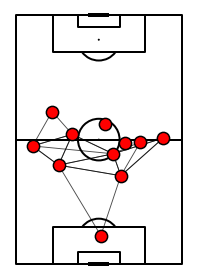

In [129]:
#plot the pitch

pitch = pitch = VerticalPitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='black', line_color='black', figsize=(20,20),
              constrained_layout=True, tight_layout=False)
fig, ax = pitch.draw()

arrows = pitch.arrows(1.2*pass_between.x,.8*pass_between.y,1.2*pass_between.x_end,.8*pass_between.y_end,
                     width = .91, headwidth = 2, color = 'black', ax = ax, zorder = .2, alpha =.7)
plt.gca().invert_xaxis()
#plot the nodes

nodes = pitch.scatter(1.2*average_locations.x,.8*average_locations.y,
                     s = 150, color = 'r', edgecolors = 'black', linewidth = 1.5, alpha =1, zorder =1, ax=ax)


fig.set_facecolor('w')
ax.patch.set_facecolor('w')